# Lecture 10 Driver Programs

All of the differential equations and programs we've been working with we've just been solving for the dependent variable over some time range. A lot of the time we don't care about the generic solution over a long time range, we care about some specific result. Looking at our sky_diver case we might want to know,
    
    How long does it take for an object to hit the ground when dropped form some height?
    How fast will it be going when it hits the ground? 

In [1]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 5'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 5
 baseball.py
 efld.py
 long_ball.py
'Lorenz Solutions.png'
'Meth of Computational Physics - 10172018 - 1121 AM.zip'
 pendulum.py
 __pycache__/
 rk2.py
'Table of Contents.html'
 tan_vec.py


In [2]:
%run rk2.py

In [4]:
def sky_diver_2d(w, t):
    g = 9.80665
    rho = 1.2
    A = 1.0 
    C_d = 1.0
    m = 100.0 
    
    alpha = 0.5 * rho * A * C_d / m
    
    vx = w[2]
    vy = w[3]
    
    speed = np.sqrt(w[2]**2 + w[3]**2)
    ax = -alpha * speed * w[2]
    ay = - g - alpha * speed * w[3]
    
    return np.array([vx, vy, ax, ay])

In [9]:
t, w = rk2([0, 1000, 0, 0], 0, 40, 0.01, sky_diver_2d)

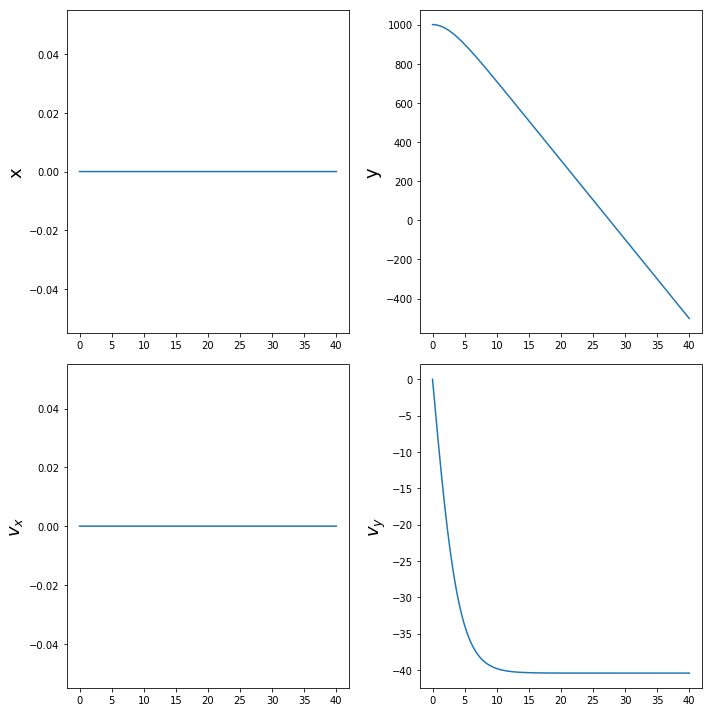

In [10]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,10))
ax1.plot(t, w[:,0])
ax1.set_ylabel('x', size = 18)

ax2.plot(t, w[:, 1])
ax2.set_ylabel('y', size = 18)

ax3.plot(t, w[:,2])
ax3.set_ylabel('$v_x$', size = 18)

ax4.plot(t, w[:,3])
ax4.set_ylabel('$v_y$', size = 18)

plt.tight_layout()

Now if I want to know the time it took to hit the ground it would require me to do a little more work. I could do something like bisection to see where y = 0. That would give me the time it takes it hit the ground, and then I could match that time with the velocity graph to figure out how fast the sky_diver was going when they hit the ground. But I'd like it if the computer just did that for me.

Also if I only care about one specific value, it's a waist of memory to tell the computer to remember all of the velocity and possition values. I don't care what the velocity of the sky diver was at t = 10, but the computer is remembering it. I want the computer to forget older values and only remember the end result that I care about.

In [18]:
# First attempt at doing this
def ground1(w0):
    """
    Program will find the time it takes to hit the ground and the velocity when it hits the ground.
    """
    t0 = 0 # Initial time
    dt = 0.001 # Step size I want to take
    
    while w0[1] > 0: # While the 'y' value is greater than zero.
        t, w = rk2(w0, t0, t0+dt, dt, sky_diver_2d) # Run rk2 from t0 -> t0+dt (take one step)
        w0 = w[-1] # The end point will be my new starting point
        t0 += dt # What time I ended things at will be my new starting time. 
    return t, w0

In [19]:
ground1([0,1000,0,0])

(array([19.303, 19.304, 19.305]),
 array([ 0.00000000e+00, -1.18380557e-02,  0.00000000e+00, -4.04281044e+01]))

1. This doesn't return the time it takes to hit the ground. It returns a 't' array (3 numbers). We could infer that the time it takes to hit the ground is the middle value. 
2. Final 'y' value is negative. So the sky diver still tunnels into the ground. The final velocity might not be -4.589 but slightly smaller than that when y = 0.
3. The final time array has 3 elements? We set up rk2 to take only 1 step, but it looks like it's taking 2 steps, why is that? 

To try to do better lets have our program print out it's values at each step so we can see what's happening

In [20]:
# Second try
def ground2(w0):
    """
    Program will find the time it takes to hit the ground and the velocity when it hits the ground.
    """
    t0 = 0 # Initial time
    #dt = 0.1 # Step size I want to take, larger this time so we have fewer print statments
    dt = 0.01
    while w0[1] > 0: # While the 'y' value is greater than zero.
        t, w = rk2(w0, t0, t0+dt, dt, sky_diver_2d) # Run rk2 from t0 -> t0+dt (take one step)
        print('Time {} \n Array {} \n)'.format(t, w)) # Print the result after each step to see how things are working
        w0 = w[-1] # The end point will be my new starting point
        t0 += dt # What time I ended things at will be my new starting time. 
    return t, w0

In [21]:
ground2([0,1,0,0]) # Start 1 meter above the ground so we don't have thousands of prints

Time [0.   0.01] 
 Array [[ 0.          1.          0.          0.        ]
 [ 0.          0.99950967  0.         -0.09806636]] 
)
Time [0.01 0.02] 
 Array [[ 0.          0.99950967  0.         -0.09806636]
 [ 0.          0.99803867  0.         -0.19613156]] 
)
Time [0.02 0.03] 
 Array [[ 0.          0.99803867  0.         -0.19613156]
 [ 0.          0.99558704  0.         -0.29419445]] 
)
Time [0.03 0.04 0.05] 
 Array [[ 0.          0.99558704  0.         -0.29419445]
 [ 0.          0.99215479  0.         -0.39225388]
 [ 0.          0.98774196  0.         -0.4903087 ]] 
)
Time [0.04 0.05 0.06] 
 Array [[ 0.          0.98774196  0.         -0.4903087 ]
 [ 0.          0.98234861  0.         -0.58835775]
 [ 0.          0.97597481  0.         -0.68639987]] 
)
Time [0.05 0.06 0.07] 
 Array [[ 0.          0.97597481  0.         -0.68639987]
 [ 0.          0.96862062  0.         -0.78443392]
 [ 0.          0.96028613  0.         -0.88245874]] 
)
Time [0.06 0.07] 
 Array [[ 0.          0.9602

(array([0.28, 0.29, 0.3 ]),
 array([ 0.        , -0.08080878,  0.        , -4.58926153]))

The first set of values look good, but the second time array has thee values for some reason? 

Why?

Because float

In [22]:
0.1 + 0.1 + 0.1 <= 0.3 # True or False?

False

In [23]:
print(0.1+ 0.1+0.1)

0.30000000000000004


The computer can't use 0.1 exactly. What the computer is doing behind the sceance is turning 0.1 into a number in binary as close as it can get to 0.1. The best it can do is, 0.1000000000000000055511151231257827021181583404541015625
https://docs.python.org/3/tutorial/floatingpoint.html (if you want more)

Normally when we did np.arange() it wouldn't return the final value

In [24]:
np.arange(0, 0.2, 0.1)

array([0. , 0.1])

In [26]:
np.arange(0.1, 0.1+0.1+0.1 , 0.1)

array([0.1, 0.2])

This is a slight problem, but we can get around it by changing the line

    w0 = w[1]
rather than w[-1]

There are other fixes, but this will require the least work with what we have right now.

Looking at the last print statement, we have, 

    Time [0.3 0.4] 
     Array [[ 0.          0.21653351  0.         -3.91058231]
     [ 0.         -0.22309919  0.         -4.87965069]] 
     
The sky diver crosses the ground at some point between 0.3 seconds and 0.4 seconds, and the velocity will be somewhere between 3.91 and 4.88. We can make this better by taking smaller steps, but no matter how small of steps we take this will still be a problem at some level. If we change our step size to 0.01, the final print statment is,

    Time [0.28 0.29 0.3 ] 
     Array [[ 0.          0.00903986  0.         -4.39555064]
     [ 0.         -0.03540018  0.         -4.49243219]
     [ 0.         -0.08080878  0.         -4.58926153]] 

We still have the problem of being between 0.28 and 0.29 seconds and a velocity between -4.395 and -4.492

In [27]:
def ground3(w0):
    """
    Program will find the time it takes to hit the ground and the velocity when it hits the ground.
    """
    t0 = 0 # Initial time
    #dt = 0.1 # Step size I want to take, larger this time so we have fewer print statments
    dt = 0.01
    while w0[1] > 0: # While the 'y' value is greater than zero.
        t, w = rk2(w0, t0, t0+dt, dt, sky_diver_2d) # Run rk2 from t0 -> t0+dt (take one step)
        #print('Time {} \n Array {} \n)'.format(t, w))
        w0 = w[1] # The end point will be my new starting point
        t0 += dt # What time I ended things at will be my new starting time. 
    
    vx0 = w[0,2]
    vy0 = w[0,3]
    v0 = np.sqrt(vx0**2 + vy0**2)
    
    vx1 = w[1,2]
    vy1 = w[1,3]
    v1 = np.sqrt(vx1**2 + vy1**2)
    #print(v0, v1)
    
    y0 = w[0,1]
    y1 = w[1,1]
    frac = y0 / (y0 - y1)
    #print(frac)
    v_ground = v0 * (1-frac) + v1 * frac
    t_ground = t[0] * (1-frac) + t[1] * frac
    return t_ground, v_ground

In [29]:
ground3([0,2000,30,10])

(53.653669943089724, 40.42822858428217)

Solving these kind of 'driver problems' can be a little more art than science. There's not just a one size fits all method.